## Input Dataset

In [1]:
import pandas as pd

In [2]:
sad_df = pd.read_csv('../InputData/sad.csv',index_col=0)
happy_df = pd.read_csv('../InputData/happy.csv',index_col=0)

### 0 = happy, 1 = sad

In [3]:
mood_sad = ['Sad']*sad_df.shape[0]
mood_happy = ['Happy']*happy_df.shape[0]
sad_df['Moods'] = mood_sad
happy_df['Moods'] = mood_happy
sad_df['mood'] = ['1']*sad_df.shape[0]
happy_df['mood'] = ['0']*happy_df.shape[0]

In [4]:
test_df = pd.concat([sad_df,happy_df]).reset_index(drop=True)
print(test_df.shape)
test_df.head()

(5301, 20)


,name,album,artist,release_date,length,popularity,key,mode,valence,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,mood,Moods
0,everything i wanted,everything i wanted,Billie Eilish,2019-11-13,245425,82,6,0,0.243,0.704,0.9020,0.225,0.657000,0.106,-14.454,0.0994,120.006,4,1,Sad
1,ghostin,"thank u, next",Ariana Grande,2019-02-08,271466,69,9,1,0.110,0.287,0.4180,0.364,0.000018,0.185,-8.295,0.0306,103.777,4,1,Sad
2,Too Good At Goodbyes,The Thrill Of It All (Special Edition),Sam Smith,2017-11-03,201000,74,5,1,0.476,0.681,0.6400,0.372,0.000000,0.169,-8.237,0.0432,91.873,4,1,Sad
3,i love you,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,291796,80,0,1,0.120,0.421,0.9520,0.131,0.004530,0.109,-18.435,0.0382,137.446,4,1,Sad
4,I Fall Apart,Stoney (Deluxe),Post Malone,2016-12-09,223346,80,8,0,0.291,0.556,0.0689,0.538,0.000000,0.196,-5.408,0.0382,143.950,4,1,Sad


In [3]:
test_df = test_df.drop(labels='valence',axis=1)

In [4]:
test_df.to_csv("../InputData/happy_sad_dataset.csv",sep = ',')

## Machine Learning Model

In [1]:
import pandas as pd
test_df = pd.read_csv("../InputData/happy_sad_dataset.csv",index_col=0)

### Initial Works

In [2]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
X = test_df.drop(labels=['name','album','artist','release_date','length','mood','Moods','loudness','popularity'],axis=1)
y = test_df['mood']

In [4]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [7]:
# define the multinomial logistic regression model
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train_scaled,y_train)
# report the model performance
y_pred = lr_model.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.814


In [8]:

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,332,121
Actual 1,125,748


Accuracy Score : 0.8144796380090498
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       453
           1       0.86      0.86      0.86       873

    accuracy                           0.81      1326
   macro avg       0.79      0.79      0.79      1326
weighted avg       0.81      0.81      0.81      1326



## Decision Tree

In [9]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,323,130
Actual 1,112,761


Accuracy Score : 0.8174962292609351
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       453
           1       0.85      0.87      0.86       873

    accuracy                           0.82      1326
   macro avg       0.80      0.79      0.80      1326
weighted avg       0.82      0.82      0.82      1326



## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=20, random_state=78) 
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,343,110
Actual 1,100,773


Accuracy Score : 0.8416289592760181
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       453
           1       0.88      0.89      0.88       873

    accuracy                           0.84      1326
   macro avg       0.82      0.82      0.82      1326
weighted avg       0.84      0.84      0.84      1326



In [17]:
X_total_scale = X_scaler.transform(X)

In [17]:
y_RF_pred = rf_model.predict(X_total_scale)
for index,row in test_df.iterrows():
    if row['mood'] == y_RF_pred[index]:
        test_df.loc[index,'RF_Results'] = 'True'
    else:
        test_df.loc[index,'RF_Results'] = 'False'

In [18]:
test_df.to_csv('../analysis_data/output_data/happy_sad_with_ML.csv',sep=',')

In [13]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Random Forest Feature Importance')

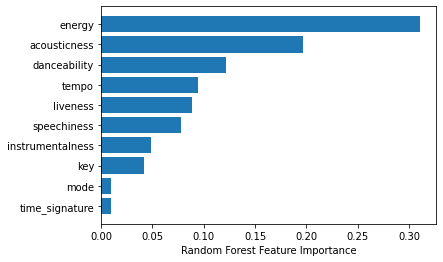

In [26]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X.columns.values[sorted_idx],rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### AdaBoost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [1.4,1.5,1.6,1.7,1.8,1.9,2.0]
for learning_rate in learning_rates:
   classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=learning_rate,
   max_features=5,
   max_depth=3,
   random_state=0)
   classifier.fit(X_train_scaled, y_train)
   print("Learning rate: ", learning_rate)
   print("Accuracy score (training): {0:.3f}".format(
       classifier.score(
           X_train_scaled,
           y_train)))
   print("Accuracy score (validation): {0:.3f}".format(
       classifier.score(
           X_test_scaled,
           y_test)))

Learning rate:  1.4
Accuracy score (training): 0.871
Accuracy score (validation): 0.799
Learning rate:  1.5
Accuracy score (training): 0.875
Accuracy score (validation): 0.823
Learning rate:  1.6
Accuracy score (training): 0.872
Accuracy score (validation): 0.803
Learning rate:  1.7
Accuracy score (training): 0.852
Accuracy score (validation): 0.790
Learning rate:  1.8
Accuracy score (training): 0.841
Accuracy score (validation): 0.782
Learning rate:  1.9
Accuracy score (training): 0.685
Accuracy score (validation): 0.689
Learning rate:  2.0
Accuracy score (training): 0.808
Accuracy score (validation): 0.757


In [20]:
classifier = GradientBoostingClassifier(n_estimators=20,
   learning_rate=1.5, max_features=5, max_depth=3, random_state=0)

classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8227752639517345


In [21]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
   cm, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,320,133
Actual 1,102,771


In [22]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,320,133
Actual 1,102,771


Accuracy Score : 0.8227752639517345
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       453
           1       0.85      0.88      0.87       873

    accuracy                           0.82      1326
   macro avg       0.81      0.79      0.80      1326
weighted avg       0.82      0.82      0.82      1326



## 2020 Spotify Dataset

In [23]:
spotify_2020_df = pd.read_csv('../analysis_data/spotify_wrapped_billboard/merged.csv',index_col=0) 

In [24]:
test_2020 =spotify_2020_df.drop(labels=['name','song_uri','artist_name','artist_id','year','duration_ms','loudness','valence'],axis=1)

In [25]:
# Creating StandardScaler instance
scaler_2020 = StandardScaler()

# Fitting Standard Scaller
test_scaler_2020 = scaler.fit(test_2020)

# Scaling data
test_2020_scaled = test_scaler_2020.transform(test_2020)

In [26]:
pred_2020 = rf_model.predict(test_2020_scaled)
spotify_2020_df['mood'] = pred_2020

In [27]:
for index,row in spotify_2020_df.iterrows():
    if row['mood'] == '1':
        spotify_2020_df.loc[index,'Moods'] = 'Sad'
    else:
        spotify_2020_df.loc[index,'Moods'] = 'Happy'

In [28]:
spotify_2020_df.drop(labels='valence',axis=1)
spotify_2020_df.to_csv('../analysis_data/output_data/spotify_2020_with_Moods.csv',sep=',')